<h1 style="color: blue; font-family: Arial, sans-serif; text-align: center; font-size: 2.5em; margin-bottom: 20px;">
  Analysis of Chemical Componentss
</h1>



<h2 style="color: #red; font-family: Arial, sans-serif; text-align: center; font-size: 2.5em; margin-bottom: 20px;">
  Task 1 : Import Libraries
</h1>



In [29]:

import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns


<h1 style="color: #4CAF50; font-family: Arial, sans-serif; text-align: center; font-size: 2.5em; margin-bottom: 20px;">
   2. Load the Dataset
</h1>



In [30]:
# Read the CSV file
df = pd.read_csv("cosmetics.csv")



In [31]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')


<h1 style="color: #4CAF50; font-family: Arial, sans-serif; text-align: center; font-size: 2.5em; margin-bottom: 20px;">
   3. Data Exploration
</h1>



In [32]:
# Display a sample of five rows
display(df.head(5))


,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


In [33]:
# Display counts of types of product
print(df['Label'].value_counts())

Label
Moisturizer    298
Cleanser       281
Face Mask      266
Treatment      248
Eye cream      209
Sun protect    170
Name: count, dtype: int64


In [34]:
# Get a summary of the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   Brand        1472 non-null   object 
 2   Name         1472 non-null   object 
 3   Price        1472 non-null   int64  
 4   Rank         1472 non-null   float64
 5   Ingredients  1472 non-null   object 
 6   Combination  1472 non-null   int64  
 7   Dry          1472 non-null   int64  
 8   Normal       1472 non-null   int64  
 9   Oily         1472 non-null   int64  
 10  Sensitive    1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB
None


In [35]:
# Step 5: Check data types and convert if necessary
print("Data Types:\n", df.dtypes)


Data Types:
 Label           object
Brand           object
Name            object
Price            int64
Rank           float64
Ingredients     object
Combination      int64
Dry              int64
Normal           int64
Oily             int64
Sensitive        int64
dtype: object


In [36]:
# Descriptive statistics
print(df.describe())

             Price         Rank  Combination          Dry       Normal  \
count  1472.000000  1472.000000   1472.00000  1472.000000  1472.000000   
mean     55.584239     4.153261      0.65625     0.614130     0.652174   
std      45.014429     0.633918      0.47512     0.486965     0.476442   
min       3.000000     0.000000      0.00000     0.000000     0.000000   
25%      30.000000     4.000000      0.00000     0.000000     0.000000   
50%      42.500000     4.300000      1.00000     1.000000     1.000000   
75%      68.000000     4.500000      1.00000     1.000000     1.000000   
max     370.000000     5.000000      1.00000     1.000000     1.000000   

              Oily    Sensitive  
count  1472.000000  1472.000000  
mean      0.607337     0.513587  
std       0.488509     0.499985  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       1.000000     1.000000  
75%       1.000000     1.000000  
max       1.000000     1.000000  


<h1 style="color: #4CAF50; font-family: Arial, sans-serif; text-align: center; font-size: 2.5em; margin-bottom: 20px;">
   4. Data Cleaning
</h1>



In [37]:
#: Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)



Missing Values:
 Label          0
Brand          0
Name           0
Price          0
Rank           0
Ingredients    0
Combination    0
Dry            0
Normal         0
Oily           0
Sensitive      0
dtype: int64


In [38]:
# Remove duplicates
df.drop_duplicates(inplace=True)

<h1 style="color: #4CAF50; font-family: Arial, sans-serif; text-align: center; font-size: 2.5em; margin-bottom: 20px;">
   5. Data Analysis
</h1>



In [39]:
# Average price of moisturizers
average_price = df['Price'].mean()
print(f'Average Price: {average_price}')




Average Price: 55.58423913043478


In [40]:
# Count of moisturizers by brand
brand_count = df['Brand'].value_counts()
print(brand_count)



Brand
CLINIQUE              79
SEPHORA COLLECTION    66
SHISEIDO              63
ORIGINS               54
MURAD                 47
                      ..
SON & PARK             1
MAKEUP ERASER          1
KAT VON D              1
NURSE JAMIE            1
DERMAFLASH             1
Name: count, Length: 116, dtype: int64


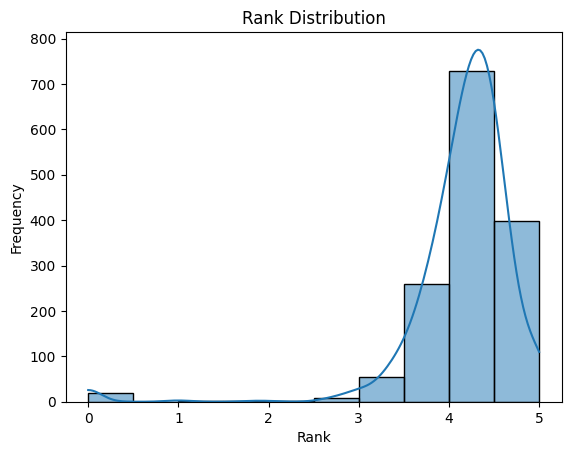

In [41]:
# Rank distribution
sns.histplot(df['Rank'], bins=10, kde=True)
plt.title('Rank Distribution')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

In [42]:
pip install wordcloud



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


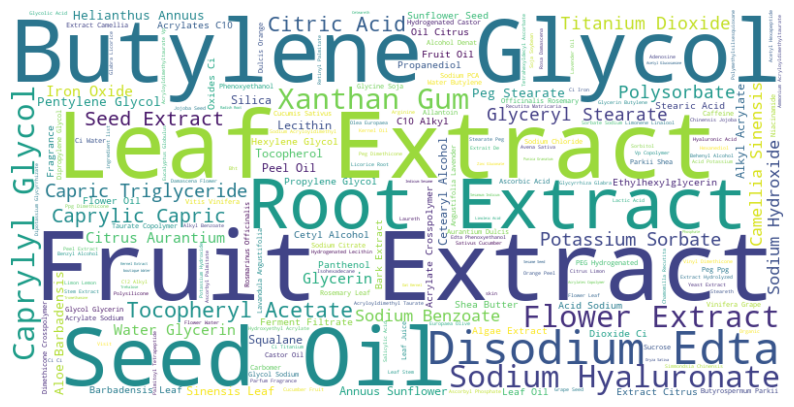

In [43]:
from wordcloud import WordCloud

# Combine all ingredients into a single string
ingredients_combined = ' '.join(df['Ingredients'].astype(str))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ingredients_combined)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


 <h1 style="color: #red; font-family: Arial, sans-serif; text-align: center; font-size: 2.5em; margin-bottom: 20px;">
   Task 2: Filter the Data for Moisturizers and Dry Skin
</h1>

                         

In [44]:
# Filter df for "Moisturizer" in the Label column
moisturizers = df[df['Label'] == "Moisturizer"]

# Filter moisturizers for 1 in the Dry column
moisturizers_dry = moisturizers[moisturizers['Dry'] == 1]

# Reset the index of moisturizers_dry
moisturizers_dry.reset_index(drop=True, inplace=True)


In [45]:
# Display the first five rows of moisturizers_dry
print(moisturizers_dry.head())


         Label           Brand                                           Name  \
0  Moisturizer          LA MER                                Crème de la Mer   
1  Moisturizer           SK-II                       Facial Treatment Essence   
2  Moisturizer  DRUNK ELEPHANT                     Protini™ Polypeptide Cream   
3  Moisturizer          LA MER                    The Moisturizing Soft Cream   
4  Moisturizer    IT COSMETICS  Your Skin But Better™ CC+™ Cream with SPF 50+   

   Price  Rank                                        Ingredients  \
0    175   4.1  Algae (Seaweed) Extract, Mineral Oil, Petrolat...   
1    179   4.1  Galactomyces Ferment Filtrate (Pitera), Butyle...   
2     68   4.4  Water, Dicaprylyl Carbonate, Glycerin, Ceteary...   
3    175   3.8  Algae (Seaweed) Extract, Cyclopentasiloxane, P...   
4     38   4.1  Water, Snail Secretion Filtrate, Phenyl Trimet...   

   Combination  Dry  Normal  Oily  Sensitive  
0            1    1       1     1          1  
1   

 <h1 style="color: #red; font-family: Arial, sans-serif; text-align: center; font-size: 2.5em; margin-bottom: 20px;">
   Task 3: Tokenize the Ingredients and Create a Bag of Words
</h1>

                         

In [46]:
# Initialize variables
corpus = []
ingredient_idx = {}
idx = 0

# Tokenize the ingredients
for ingredients in moisturizers_dry['Ingredients']:
    # Make ingredients lowercase and split into tokens
    tokens = ingredients.lower().split(', ')
    corpus.append(tokens)
    
    # Update ingredient index
    for ingredient in tokens:
        if ingredient not in ingredient_idx:
            ingredient_idx[ingredient] = idx
            idx += 1


 <h1 style="color: #red; font-family: Arial, sans-serif; text-align: center; font-size: 2.5em; margin-bottom: 20px;">
  Task 4: Initialize a Document-Term Matrix
</h1>

                         

In [47]:
# Get total number of products and ingredients
M = len(moisturizers_dry)
N = len(ingredient_idx)

# Create a matrix of zeros with size MxN
A = np.zeros((M, N))


 <h1 style="color: #red; font-family: Arial, sans-serif; text-align: center; font-size: 2.5em; margin-bottom: 20px;">
  Task 5: Create a Function Named oh_encoder
</h1>

                         

In [48]:
def oh_encoder(tokens):
    # Initialize a matrix of zeros with width N
    x = np.zeros(N)
    
    # Get index values for each ingredient
    for token in tokens:
        if token in ingredient_idx:
            x[ingredient_idx[token]] = 1
    
    return x


 <h1 style="color: #red; font-family: Arial, sans-serif; text-align: center; font-size: 2.5em; margin-bottom: 20px;">
  Task 6: Get the Binary Value of the Tokens for Each Row of the Matrix A
</h1>

                         

In [49]:
# Apply oh_encoder() to each list of tokens in corpus
for i, tokens in enumerate(corpus):
    A[i] = oh_encoder(tokens)


<h1 style="color: #red; font-family: Arial, sans-serif; text-align: center; font-size: 2.5em; margin-bottom: 20px;">
  Task 7: Reduce the Dimensions of the Matrix Using t-SNE 
</h1>

                         

In [50]:
# Create a TSNE instance
model = TSNE(n_components=2, learning_rate=200, random_state=42)

# Apply fit_transform() to the matrix A
tsne_features = model.fit_transform(A)

moisturizers_dry.loc[:, 'X'] = tsne_features[:, 0]
moisturizers_dry.loc[:, 'Y'] = tsne_features[:, 1]


<h1 style="color: #red; font-family: Arial, sans-serif; text-align: center; font-size: 2.5em; margin-bottom: 20px;">
  Task 8: Plot a Scatter Plot with the Vectorized Items 
</h1>

                         

In [51]:
from bokeh.io import output_notebook
output_notebook()  # Enable Bokeh output in Jupyter notebook


Loading BokehJS ...

In [52]:

from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource

# Create a ColumnDataSource
source = ColumnDataSource(moisturizers_dry)

# Create a scatter plot
plot = figure(title="t-SNE Visualization of Moisturizers", x_axis_label='T-SNE 1', y_axis_label='T-SNE 2')
plot.circle(x='X', y='Y', source=source)


GlyphRenderer(id='p1043', ...)

 <h1 style="color: #red; font-family: Arial, sans-serif; text-align: center; font-size: 2.5em; margin-bottom: 20px;">
  Task 9: Add a Hover Tool
</h1>

                         

In [53]:
# Import necessary libraries
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure

# Enable inline output for Jupyter Notebook
output_notebook()

# Create a ColumnDataSource from your DataFrame
source = ColumnDataSource(moisturizers_dry)

# Create a figure for the plot
plot = figure(title='t-SNE Visualization of Moisturizers for Dry Skin', 
              x_axis_label='T-SNE 1', 
              y_axis_label='T-SNE 2',
              tools="pan,box_zoom,reset")  # Adding default tools

# Add circle renderer
plot.circle(x='X', y='Y', source=source, size=8, color='navy', alpha=0.5)

# Define tooltips
hover = HoverTool(tooltips=[
    ('Item', '@Name'), 
    ('Brand', '@Brand'), 
    ('Price', '$@Price'), 
    ('Rank', '@Rank')
])

# Add the hover tool to the plot
plot.add_tools(hover)



Loading BokehJS ...

 <h1 style="color: #red; font-family: Arial, sans-serif; text-align: center; font-size: 2.5em; margin-bottom: 20px;">
  Task 10: Display the Plot
</h1>

                         

In [54]:
# Display the plot
show(plot)


<h1 style="color: #red; font-family: Arial, sans-serif; text-align: center; font-size: 2.5em; margin-bottom: 20px;">
  Task 11: Print Out the Ingredients for Two Similar Products 
</h1>

                         

In [55]:
# Extracting products
product_1 = moisturizers_dry[moisturizers_dry['Name'] == 'Color Control Cushion Compact Broad Spectrum SPF 50+']
product_2 = moisturizers_dry[moisturizers_dry['Name'] == 'BB Cushion Hydra Radiance SPF 50']

# Printing the ingredients with better formatting
print("Ingredients for Color Control Cushion Compact Broad Spectrum SPF 50+:")
print("\n".join(product_1['Ingredients'].values[0].split(',')))

print("\nIngredients for BB Cushion Hydra Radiance SPF 50:")
print("\n".join(product_2['Ingredients'].values[0].split(',')))


Ingredients for Color Control Cushion Compact Broad Spectrum SPF 50+:
Phyllostachis Bambusoides Juice
 Cyclopentasiloxane
 Cyclohexasiloxane
 Peg-10 Dimethicone
 Phenyl Trimethicone
 Butylene Glycol
 Butylene Glycol Dicaprylate/Dicaprate
 Alcohol
 Arbutin
 Lauryl Peg-9 Polydimethylsiloxyethyl Dimethicone
 Acrylates/Ethylhexyl Acrylate/Dimethicone Methacrylate Copolymer
 Polyhydroxystearic Acid
 Sodium Chloride
 Polymethyl Methacrylate
 Aluminium Hydroxide
 Stearic Acid
 Disteardimonium Hectorite
 Triethoxycaprylylsilane
 Ethylhexyl Palmitate
 Lecithin
 Isostearic Acid
 Isopropyl Palmitate
 Phenoxyethanol
 Polyglyceryl-3 Polyricinoleate
 Acrylates/Stearyl Acrylate/Dimethicone Methacrylate Copolymer
 Dimethicone
 Disodium Edta
 Trimethylsiloxysilicate
 Ethylhexyglycerin
 Dimethicone/Vinyl Dimethicone Crosspolymer
 Water
 Silica
 Camellia Japonica Seed Oil
 Camillia Sinensis Leaf Extract
 Caprylyl Glycol
 1
2-Hexanediol
 Fragrance
 Titanium Dioxide
 Iron Oxides (Ci 77492
 Ci 77491
 Ci7749